## Work environment

In [1]:
# Import
import os
import pickle
import numpy as np
import math

from src.evaluation.functions_evaluation import prediction_statistics, damerau_levenshtein_similarity, evaluate_seq_accuracy
from src.visualization.functions_evaluation_visualize import plot_levenshtein_distance
from src.general.functions_time import get_timestamp
from src.general.functions_report import report_evaluation

2023-12-05 10:48:49.004573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 10:48:49.504682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Set tensorflow to GPU-only (data is stored as tensors even when tf is not used)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
# Change working directory
# working_directory = 'c:/Users/Steph/OneDrive - Universität Bayreuth/Masterarbeit/03_Programmierung/remaining_trace_prediction_master_thesis_stephan_faatz'
working_directory = '/home/jupyter-sfaatz/'
os.chdir(working_directory)
print("Working directory: ", os.getcwd())

Working directory:  /home/jupyter-sfaatz


## Parameter

In [59]:
# Set path variables
path_raw = 'data/raw/'
path_interim = 'data/interim/'
path_benchmark = 'data/benchmark/'
path_data = 'data/processed/'
path_control = 'data/control/'
path_predictions = 'data/predictions/'
path_models = 'models/'
path_reports = 'reports/'

In [60]:
# Get timestamp
timestamp = get_timestamp()

In [61]:
# Initalize variables
filename_variables = 'variables_helpdesk_true.pkl'

with open(path_control + filename_variables, 'rb') as file:
    variables = pickle.load(file)

## Evaluation

In [62]:
# Load data
predictions = np.load(path_predictions + variables['filename_predictions'])

In [63]:
# Load predictions
y_test = predictions['y_test'][:,1:] # Remove start token
y_test_benchmark = predictions['y_test_benchmark']
y_pred_transformer = predictions['y_pred_transformer'][:,1:] # Remove start token
y_pred_lstm = predictions['y_pred_lstm']
y_pred_rf = predictions['y_pred_rf']
y_pred_lg = predictions['y_pred_rg']

In [64]:
# Calculate percentiles
variables['prediction_length_25'] = math.ceil(np.percentile(variables['MAX_TOKENS'], 0.25))
variables['prediction_length_50'] = math.ceil(np.percentile(variables['MAX_TOKENS'], 0.50))
variables['prediction_length_75'] = math.ceil(np.percentile(variables['MAX_TOKENS'], 0.75))

##  Reference data

Average Trace length: 3.6168
Please be aware that the average trace length contains the end token.



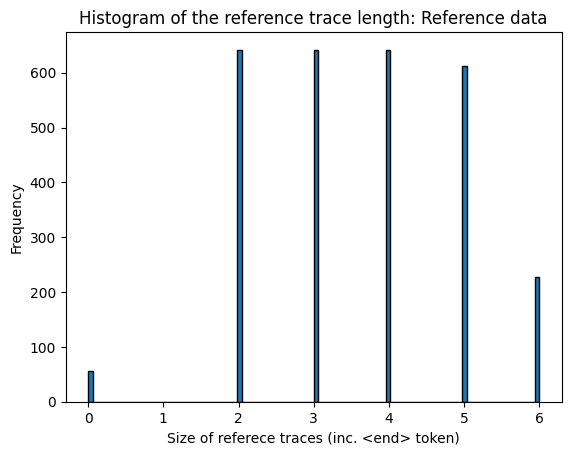

Average Trace length: 2.6367
Please be aware that the average trace length contains the end token.



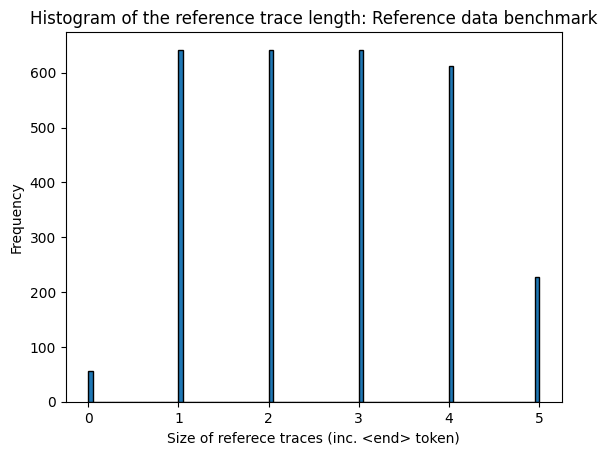

In [70]:
# Calculate trace length for test and benachmark reference set
variables['trace_length_reference'], avg_pred_trace_length = prediction_statistics(y_test[:,:], path_reports, 'Reference data', timestamp, bins = 100, ref = True)
variables['trace_length_reference_benchmark'], avg_pred_trace_length = prediction_statistics(y_test_benchmark, path_reports, 'Reference data benchmark', timestamp, bins = 100, ref = True)

## Transformer

Average prediction length for (transformer_weights_helpdesk_false.h5): 4.6475
Please be aware that the average prediction length contains the end token.



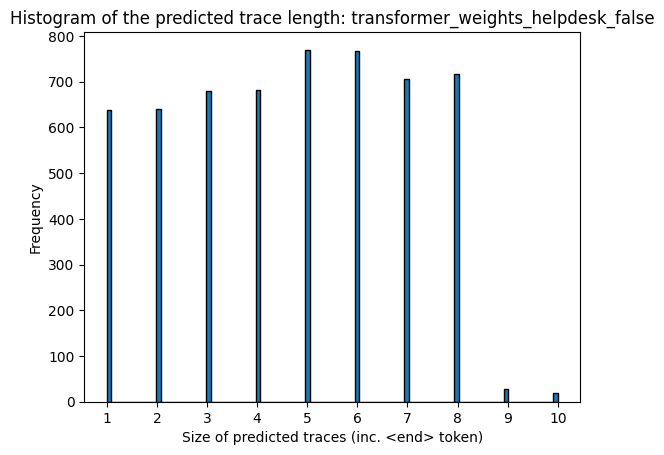

In [11]:
# Calculate prediction statistics
variables['predicted_trace_length_transformer'], avg_pred_trace_length = prediction_statistics(y_pred_transformer, path_reports, variables['transformer_model'], timestamp, bins = 100)

### DLS

In [12]:
# Calculate similarity for the full sequence length
variables['similarity_transformer_100'] = damerau_levenshtein_similarity(y_test, y_pred_transformer, variables['trace_length_reference'], variables['predicted_trace_length_transformer'], variables["MAX_TOKENS"])

Comparing Sequences:  30%|██▉       | 1684/5643 [00:00<00:00, 8410.01it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15. 15. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 14. 17.  3.]
Similarity:  0.7142857142857143
y_test:      [ 6.  7. 15. 15. 17.  3.]
y_pred:      [ 6.  7. 14. 14. 17.  3.]
Similarity:  0.6666666666666666
y_test:      [ 6.  7. 15. 17.  3.]
y_pred:      [ 6.  7. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 15. 17.  3.]
y_pred:      [ 7. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.6
y_test:      [ 5.  9.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 14. 17.  3.]
Similarity:  0.5555555555555556
y_test:      [ 9.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 6

Comparing Sequences:  60%|█████▉    | 3362/5643 [00:00<00:00, 8208.62it/s]

[ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.625
y_test:      [ 5.  6.  7. 19. 19. 17.  3.]
y_pred:      [ 5.  6.  7. 19. 19. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 19. 19. 17.  3.]
y_pred:      [ 6.  7. 19. 19. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 19. 17.  3.]
y_pred:      [ 6.  7. 19. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 19. 17.  3.]
y_pred:      [ 7. 19. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.625
y_test:      [ 5.  6.  7. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 18. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 18. 18. 17.  3.]
y_pred:      [ 6.  7. 18. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 18. 17.  3.]
y_pred:      [ 6.  7. 18. 17.  3.]
Similarity:  1.

Comparing Sequences:  89%|████████▉ | 5009/5643 [00:00<00:00, 8131.38it/s]

[ 7. 17.  3.]
y_pred:      [ 7. 27. 17.  3.]
Similarity:  0.75
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.625
y_test:      [ 5.  6.  7. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 18. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 18. 18. 17.  3.]
y_pred:      [ 6.  7. 18. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 18. 17.  3.]
y_pred:      [ 6.  7. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 18. 17.  3.]
y_pred:      [ 7. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 19. 19. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.75
y_test:      [ 5.  6.  7. 19. 19. 17.  3.]
y_

Comparing Sequences: 100%|██████████| 5643/5643 [00:00<00:00, 8140.29it/s]

[ 6.  7. 27. 17.  3.]
Similarity:  0.5555555555555556
y_test:      [ 5.  6.  7. 27. 27. 27. 17.  3.]
y_pred:      [ 5.  6.  7. 27. 27. 27. 17.  3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 27. 27. 17.  3.]
y_pred:      [ 5.  6.  7. 27. 27. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 27. 27. 17.  3.]
y_pred:      [ 6.  7. 27. 27. 17.  3.]
Similarity:  1.0
y_test:      [ 6.  7. 27. 17.  3.]
y_pred:      [ 6.  7. 27. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 27. 17.  3.]
y_pred:      [ 7. 27. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 27. 27. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.75
y_test:      [ 5.  6.  7. 27. 27. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 14. 17.  3.]
Similarity:  0.7142857142857143
y_test:      [ 6.  7. 27. 27. 17.  3.]
y_pred:      [ 

In [13]:
# Calculate similarity for 25% sequence length
variables['similarity_transformer_25'] = damerau_levenshtein_similarity(y_test, y_pred_transformer, variables['trace_length_reference'], variables['predicted_trace_length_transformer'], variables['prediction_length_25'])

Comparing Sequences:  47%|████▋     | 904/1925 [00:00<00:00, 9030.86it/s]

y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 16.]
y_pred:      [ 7. 17.]
Similarity:  0.5
y_test:      [16.]
y_pred:      [17.]
Similarity:  0.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 16.  3.  0.]
y_pred:      [ 7. 16.  3.  0.]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [16.  3

Comparing Sequences:  94%|█████████▍| 1808/1925 [00:00<00:00, 8849.98it/s]

[ 7. 16.  3.  0.]
y_pred:      [ 7. 16.  3.  0.]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [16.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 16.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  0.75
y_test:      [16.  3.  0.]
y_pred:      [17.  3.  0.]
Similarity:  0.6666666666666666
y_test:      [3. 0.]
y_pred:      [3. 0.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  0.75
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17

Comparing Sequences: 100%|██████████| 1925/1925 [00:00<00:00, 8806.08it/s]

[17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 16.]
y_pred:      [ 7. 16.]
Similarity:  1.0
y_test:      [16.]
y_pred:      [16.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred:      [ 7. 17.  3.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.]
y_pred:      [ 7. 17.]
Similarity:  1.0
y_test:      [17.]
y_pred:      [17.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.]
y_pred: 

In [14]:
# Calculate similarity for 50% sequence length
variables['similarity_transformer_50'] = damerau_levenshtein_similarity(y_test, y_pred_transformer, variables['trace_length_reference'], variables['predicted_trace_length_transformer'], variables['prediction_length_50'])

Comparing Sequences:  22%|██▏       | 850/3851 [00:00<00:00, 8493.77it/s]

y_test:      [ 6.  7. 15. 15. 17.  3.  0.]
y_pred:      [ 6.  7. 14. 14. 17.  3.  0.]
Similarity:  0.7142857142857143
y_test:      [ 6.  7. 15. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 15. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 15. 17.  3.  0.  0.]
y_pred:      [ 7. 15. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [6. 7.]
y_pred:      [6. 7.]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6.]
Similarity:  1.0
y_test:      [ 7. 18. 17.  3.  0.  0.  0.]
y_pred:      [ 7. 18. 17.  3.  0.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  0.8571428571428571
y_test:      [3. 0. 0

Comparing Sequences:  44%|████▍     | 1700/3851 [00:00<00:00, 8324.80it/s]

[ 6.  7. 14. 14. 17.  3.]
y_pred:      [ 7. 14. 17.  3.  0.  0.]
Similarity:  0.3333333333333333
y_test:      [ 6.  7. 14. 17.  3.]
y_pred:      [ 7. 17.  3.  0.  0.]
Similarity:  0.2
y_test:      [ 7. 14. 17.  3.]
y_pred:      [ 7. 14. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 6.  7. 15. 15. 17.  3.  0.]
y_pred:      [ 6.  7. 15. 15. 17.  3.  0.]
Similarity:  1.0
y_test:      [ 6.  7. 15. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 15. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 15. 17.  3.  0.  0.  0.]
y_pred:      [ 7. 15. 17.  3.  0.  0.]
Similarity:  0.8571428571428571
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.]
Similarity:  0.7142857142857143
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0.

Comparing Sequences:  66%|██████▌   | 2533/3851 [00:00<00:00, 8230.97it/s]

[ 7. 15. 17.  3.  0.  0.  0.]
y_pred:      [ 7. 15. 17.  3.  0.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  0.8571428571428571
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0.]
Similarity:  0.7142857142857143
y_test:      [ 6.  7. 18. 18. 17.  3.]
y_pred:      [ 6.  7. 19. 19.]
Similarity:  0.3333333333333333
y_test:      [ 6.  7. 18. 17.  3.]
y_pred:      [ 6.  7. 15.]
Similarity:  0.4
y_test:      [ 7. 18. 17.  3.]
y_pred:      [ 7. 18. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 6.  7. 14. 14. 17.  3.  0.]
y_pred:      [ 7. 14. 17.  3.  0.  0.  0.]
Similarity:  0.42857142857142855
y_test:      [ 6.  7. 14. 17.

Comparing Sequences:  87%|████████▋ | 3357/3851 [00:00<00:00, 8209.32it/s]

[ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  0.7142857142857143
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [6. 7.]
y_pred:      [6. 7.]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6.]
Similarity:  1.0
y_test:      [ 7. 19. 16.  3.  0.  0.  0.]
y_pred:      [ 7. 27. 17.  3.  0.  0.  0.]
Similarity:  0.7142857142857143
y_test:      [ 7. 16.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  0.8571428571428571
y_test:      [16.  3.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  0.8333333333333334
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 6.  7. 23. 23.]
y_pred:      [ 6.  7. 21. 21.]
Similarity:  0.5
y_test:      [ 6.  7. 23.]
y_pred:      [ 6.  7. 23.]
Similarity:  1.0
y_test:      [ 7. 23.]
y_pred:      [ 7. 23.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity

Comparing Sequences: 100%|██████████| 3851/3851 [00:00<00:00, 8221.89it/s]

[3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [6. 7.]
y_pred:      [ 7. 14.]
Similarity:  0.0
y_test:      [6.]
y_pred:      [7.]
Similarity:  0.0
y_test:      [ 7. 14. 17.  3.  0.  0.  0.]
y_pred:      [ 7. 14. 17.  3.  0.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 6.  7. 23. 23.]
y_pred:      [ 6.  7. 14. 14.]
Similarity:  0.5
y_test:      [ 6.  7. 23.]
y_pred:      [ 6.  7. 32.]
Similarity:  0.6666666666666666
y_test:      [ 7. 23.]
y_pred:      [ 7. 23.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]


In [15]:
# Calculate similarity for 75% sequence length
variables['similarity_transformer_75'] = damerau_levenshtein_similarity(y_test, y_pred_transformer, variables['trace_length_reference'], variables['predicted_trace_length_transformer'], variables['prediction_length_75'])

Comparing Sequences:   0%|          | 0/5531 [00:00<?, ?it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15. 15. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 14. 17.  3.]
Similarity:  0.7142857142857143
y_test:      [ 6.  7. 15. 15. 17.  3.]
y_pred:      [ 6.  7. 14. 14. 17.  3.]
Similarity:  0.6666666666666666
y_test:      [ 6.  7. 15. 17.  3.]
y_pred:      [ 6.  7. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 15. 17.  3.]
y_pred:      [ 7. 15. 17.  3.]
Similarity:  1.0
y_test:      [ 7. 17.  3.]
y_pred:      [ 7. 17.  3.]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17.  3.]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3.]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
Similarity:  0.6
y_test:      [ 5.  9.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 5.  6.  7. 14. 14. 17.  3.]
Similarity:  0.5555555555555556
y_test:      [ 9.  6.  7. 18. 18. 18. 17.  3.]
y_pred:      [ 6

Comparing Sequences:  15%|█▌        | 831/5531 [00:00<00:00, 8300.67it/s]

[6.]
y_pred:      [5.]
Similarity:  0.0
y_test:      [ 7. 25. 16.  3.  0.  0.]
y_pred:      [ 7. 25. 16.  3.  0.  0.  0.  0.]
Similarity:  0.75
y_test:      [ 7. 16.  3.  0.  0.]
y_pred:      [ 7. 16.  3.  0.  0.  0.  0.]
Similarity:  0.7142857142857143
y_test:      [16.  3.  0.  0.]
y_pred:      [16.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [5. 6.]
y_pred:      [5. 6.]
Similarity:  1.0
y_test:      [5.]
y_pred:      [5.]
Similarity:  1.0
y_test:      [ 6.  7. 21. 21. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 15. 15. 17.  3.  0.  0.]
Similarity:  0.75
y_test:      [ 6.  7. 21. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 21. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 21. 17.  3.  0.  0.]
y_pred:      [ 7. 21. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [

Comparing Sequences:  30%|███       | 1662/5531 [00:00<00:00, 8088.98it/s]

[ 7. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [ 7. 32. 17.  3.  0.  0.  0.  0.  0.]
Similarity:  0.7777777777777778
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15. 22. 22.]
y_pred:      [ 5.  6.  7. 14. 15. 15.]
Similarity:  0.5
y_test:      [ 5.  6.  7. 22. 22.]
y_pred:      [ 5.  6.  7. 15. 15.]
Similarity:  0.6
y_test:      [ 6.  7. 22. 22.]
y_pred:      [ 6.  7. 15. 15.]
Similarity:  0.5
y_test:      [ 6.  7. 22.]
y_pred:      [ 6.  7. 22.]
Similarity:  1.0
y_test:      [ 7. 22.]
y_pred:      [ 7. 22.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15. 1

Comparing Sequences:  45%|████▍     | 2475/5531 [00:00<00:00, 8105.45it/s]

Similarity:  1.0
y_test:      [6.]
y_pred:      [6.]
Similarity:  1.0
y_test:      [ 7. 14. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 14. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [5. 9. 6. 7.]
y_pred:      [ 5.  6.  7. 14.]
Similarity:  0.5
y_test:      [5. 9. 6.]
y_pred:      [5. 6. 7.]
Similarity:  0.3333333333333333
y_test:      [9. 6.]
y_pred:      [6. 7.]
Similarity:  0.0
y_test:      [9.]
y_pred:      [6.]
Similarity:  0.0
y_test:      [ 6.  7. 14. 15. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 14. 14. 17.  3.  0.  0.]
Similarity:  0.875
y_test:      [ 6.  7. 15. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 14. 17.  3.  0.  0.]
Similarity:  0.8571428571428571
y_test:      [ 7. 15. 17.  3.  0.  0.]
y_pred:

Comparing Sequences:  59%|█████▉    | 3286/5531 [00:00<00:00, 8033.98it/s]

[7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15. 15. 15.]
y_pred:      [ 5.  6.  7. 14. 15. 15.]
Similarity:  0.8333333333333334
y_test:      [ 5.  6.  7. 15. 15.]
y_pred:      [ 5.  6.  7. 15. 15.]
Similarity:  1.0
y_test:      [ 6.  7. 15. 15.]
y_pred:      [ 6.  7. 15. 15.]
Similarity:  1.0
y_test:      [ 6.  7. 15.]
y_pred:      [ 6.  7. 15.]
Similarity:  1.0
y_test:      [ 7. 15.]
y_pred:      [ 7. 15.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 25. 25. 15.]
y_pred:      [ 5.  6.  7. 14. 15. 15.]
Similarity:  0.6666

Comparing Sequences:  74%|███████▍  | 4090/5531 [00:00<00:00, 8010.61it/s]

[ 7. 15. 16.  3.  0.  0.]
y_pred:      [ 7. 15. 16.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 16.  3.  0.  0.]
y_pred:      [ 7. 16.  3.  0.  0.]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [16.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [5. 6.]
y_pred:      [5. 6.]
Similarity:  1.0
y_test:      [5.]
y_pred:      [5.]
Similarity:  1.0
y_test:      [ 6.  7. 26. 26. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 27. 27. 17.  3.  0.  0.]
Similarity:  0.75
y_test:      [ 6.  7. 26. 17.  3.  0.  0.]
y_pred:      [ 6.  7. 26. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 26. 17.  3.  0.  0.]
y_pred:      [ 7. 26. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [ 7. 17.  3.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17.  3.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3. 0. 0.]
Similarity:  1.0
y_test:      [9. 9.]
y_pred:      

Comparing Sequences:  88%|████████▊ | 4893/5531 [00:00<00:00, 8016.45it/s]

[17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 32. 32. 32.]
y_pred:      [ 5.  6.  7. 14. 15. 15.]
Similarity:  0.5
y_test:      [ 5.  6.  7. 32. 32.]
y_pred:      [ 5.  6.  7. 32. 32.]
Similarity:  1.0
y_test:      [ 6.  7. 32. 32.]
y_pred:      [ 6.  7. 32. 32.]
Similarity:  1.0
y_test:      [ 6.  7. 32.]
y_pred:      [ 6.  7. 32.]
Similarity:  1.0
y_test:      [ 7. 32.]
y_pred:      [ 7. 32.]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 27. 27.]
y_pred:      [ 5.  6.  7. 14. 15. 15.]
Similarity:  0.6666666666666666
y_test:      [ 5.  6.  7. 27. 27.]
y_pred:      [ 5.  6

Comparing Sequences: 100%|██████████| 5531/5531 [00:00<00:00, 8039.92it/s]

[3. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14.]
y_pred:      [ 5.  6.  7. 14.]
Similarity:  1.0
y_test:      [5. 6. 7.]
y_pred:      [5. 6. 7.]
Similarity:  1.0
y_test:      [6. 7.]
y_pred:      [6. 7.]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6.]
Similarity:  1.0
y_test:      [ 7. 29. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 26. 17.  3.  0.  0.  0.  0.]
Similarity:  0.875
y_test:      [ 7. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7. 17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17.  3.  0.  0.  0.  0.]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3. 0. 0. 0. 0.]
Similarity:  1.0
y_test:      [5. 9. 6. 7.]
y_pred:      [ 5.  6.  7. 14.]
Similarity:  0.5
y_test:      [5. 9. 6.]
y_pred:      [5. 6. 7.]
Similarity:  0.3333333333333333
y_test:      [9. 6.]
y_pred:      [6. 7.]
Similarity:  0.0
y_test:      [9.]
y_pred:      [6.]
Similarity:  0.0
y_test:      [ 6.  7. 18. 18. 16.  3.  0.  0.]
y_pred: 

In [16]:
print("Similarity 25%:    ",variables['similarity_transformer_25'].mean())

Similarity 25%:     0.9725108225108225


In [17]:
print(variables['similarity_transformer_25'])

[1. 1. 1. ... 1. 1. 1.]


### Sequence accuracy

In [18]:
# Calculate seq_acc for the full sequence length
variables['seq_acc_transformer_100'] = evaluate_seq_accuracy(y_pred_transformer, y_test)

Correct sequences:  3142
Total sequences:    5643
Sequence accuracy:  0.5568


In [19]:
# Calculate seq_acc for 25% sequence length
variables['seq_acc_transformer_25'] = evaluate_seq_accuracy(y_pred_transformer[:,:variables['prediction_length_25']], y_test[:,:variables['prediction_length_25']])

Correct sequences:  3362
Total sequences:    5643
Sequence accuracy:  0.5958


In [20]:
# Calculate seq_acc for 50% sequence length
variables['seq_acc_transformer_50'] = evaluate_seq_accuracy(y_pred_transformer[:,:variables['prediction_length_50']], y_test[:,:variables['prediction_length_50']])

Correct sequences:  3142
Total sequences:    5643
Sequence accuracy:  0.5568


In [21]:
# Calculate seq_acc for 75% sequence length
variables['seq_acc_transformer_75'] = evaluate_seq_accuracy(y_pred_transformer[:,:variables['prediction_length_75']], y_test[:,:variables['prediction_length_75']])

Correct sequences:  3142
Total sequences:    5643
Sequence accuracy:  0.5568


## LSTM

Average prediction length for (lstm_helpdesk_false.h5): 5.5004
Please be aware that the average prediction length contains the end token.



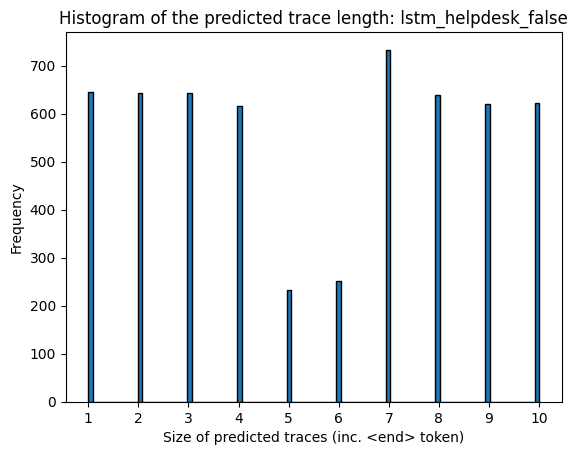

In [22]:
variables['predicted_trace_length_lstm'], avg_pred_trace_length = prediction_statistics(y_pred_lstm, path_reports, variables['lstm_model'], timestamp, bins = 100)

### DLS

In [23]:
# Calculate similarity for the full sequence length
variables['similarity_lstm_100'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lstm, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_lstm'], variables["MAX_TOKENS"])

Comparing Sequences:  35%|███▌      | 1992/5643 [00:00<00:00, 9921.42it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.8
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.7777777777777778
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.75
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.7142857142857143
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.4444444444444444
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 7  7 14 15 15 1

Comparing Sequences:  71%|███████   | 3983/5643 [00:00<00:00, 9837.20it/s]

 [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 6.  7. 15. 28. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [ 7. 15. 28. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.4444444444444444
y_test:      [15. 28. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.375
y_test:      [28. 17.  3.]
y_pred:      [14 15  3]
Similarity:  0.3333333333333333
y_test:      [17.  3.]
y_pred:      [15  3]
Similarity:  0.5
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 22. 22. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.6
y_test:      [ 6.  7. 14. 22. 22. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.5555555555555556
y_test:      [ 7. 14. 22. 22. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [14. 22. 22. 17.  3.]
y_pred:

Comparing Sequences: 100%|██████████| 5643/5643 [00:00<00:00, 9788.79it/s]

[ 7 14 15 15 15 17  3]
Similarity:  0.2857142857142857
y_test:      [20. 20. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  0.5
y_test:      [20. 17.  3.]
y_pred:      [15 17  3]
Similarity:  0.6666666666666666
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 18. 18. 15. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.6
y_test:      [ 6.  7. 18. 18. 15. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.5555555555555556
y_test:      [ 7. 18. 18. 15. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [18. 18. 15. 17.  3.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.42857142857142855
y_test:      [18. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  0.75
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarit

In [24]:
# Calculate similarity for 25% sequence length
variables['similarity_lstm_25'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lstm, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_lstm'], variables['prediction_length_25'])

Comparing Sequences:   0%|          | 0/1981 [00:00<?, ?it/s]

y_test:      [15. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [18. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [18. 16.]
y_pred:      [15 17]
Similarity:  0.0
y_test:      [16.]
y_pred:      [17]
Similarity:  0.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [14. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [19. 16.  3.  0.]
y_pred:      [17 17  3  0]
Similarity:  0.5
y_test:      [16.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  0.75
y_test:      [3. 0.

Comparing Sequences: 100%|██████████| 1981/1981 [00:00<00:00, 10551.58it/s]

[3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [4. 5. 9. 6.]
y_pred:      [5 6 7 7]
Similarity:  0.0
y_test:      [23. 16.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.5
y_test:      [16.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  0.75
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      []
y_pred:      [15 17  3  0]
Similarity:  0.0
y_test:      [16.  3. 

In [25]:
# Calculate similarity for 50% sequence length
variables['similarity_lstm_50'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lstm, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_lstm'], variables['prediction_length_50'])

Comparing Sequences:   0%|          | 0/3907 [00:00<?, ?it/s]

y_test:      [ 7. 14. 15. 15. 17.  3.  0.]
y_pred:      [ 7  7 14 15 15 15 17]
Similarity:  0.42857142857142855
y_test:      [14. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.42857142857142855
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0  0]
Similarity:  0.8571428571428571
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.7142857142857143
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [14. 18.]
y_pred:      [14 15]
Similarity:  0.5
y_test:      [18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [18. 18. 17.  3.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0]
Similarity:  0.7142857142857143
y_test:      [18. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.8571428571428571
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  

Comparing Sequences:  51%|█████     | 1996/3907 [00:00<00:00, 9986.12it/s]

[18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [18. 18. 16.  3.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0]
Similarity:  0.5714285714285714
y_test:      [18. 16.  3.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.7142857142857143
y_test:      [16.  3.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  0.7142857142857143
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  0.7142857142857143
y_test:      [14. 14. 15. 15.]
y_pred:      [14 15 15 15]
Similarity:  0.75
y_test:      [14. 15. 15.]
y_pred:      [15 15 15]
Similarity:  0.6666666666666666
y_test:      [15. 15.]
y_pred:      [15 15]
Similarity:  1.0
y_test:      [15.]
y_pred:      [15]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 7. 19. 19. 19. 16.  3.  0.]
y_pred:      [ 7  7 14 15 15 15 17]
Similari

Comparing Sequences: 100%|██████████| 3907/3907 [00:00<00:00, 9952.98it/s]

[15 15]
Similarity:  0.0
y_test:      [18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [25. 14. 14. 14. 16.  3.]
y_pred:      [14 15 15 15 17  3  0]
Similarity:  0.14285714285714285
y_test:      [14. 14. 14. 16.  3.]
y_pred:      [15 15 17 17  3  0  0]
Similarity:  0.14285714285714285
y_test:      [14. 14. 16.  3.]
y_pred:      [15 17 17  3]
Similarity:  0.25
y_test:      [14. 16.  3.]
y_pred:      [17 17  3]
Similarity:  0.3333333333333333
y_test:      [16.  3.]
y_pred:      [17  3]
Similarity:  0.5
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [15. 15. 15. 15. 16.  3.  0.]
y_pred:      [14 15 15 15 17  3  0]
Similarity:  0.7142857142857143
y_test:      [15. 15. 15. 16.  3.  0.  0.]
y_pred:      [15 15 15 17  3  0  0]
Similarity:  0.8571428571428571
y_test:      [15. 15. 16.  3.  0.  0.

In [26]:
# Calculate similarity for 75% sequence length
variables['similarity_lstm_75'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lstm, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_lstm'], variables['prediction_length_75'])

Comparing Sequences:   0%|          | 0/5587 [00:00<?, ?it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.8
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.7777777777777778
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.75
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.7142857142857143
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.4444444444444444
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 7  7 14 15 15 1

Comparing Sequences:  35%|███▍      | 1949/5587 [00:00<00:00, 9747.39it/s]

y_test:      [26. 17.  3.  0.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0  0  0]
Similarity:  0.7
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0  0  0]
Similarity:  0.7777777777777778
y_test:      [3. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0 0]
Similarity:  0.75
y_test:      [ 5.  6.  7. 14. 28.]
y_pred:      [ 5  6  7  7 14 15 15]
Similarity:  0.5714285714285714
y_test:      [ 6.  7. 14. 28.]
y_pred:      [ 6  7  7 14]
Similarity:  0.5
y_test:      [ 7. 14. 28.]
y_pred:      [ 7  7 14]
Similarity:  0.3333333333333333
y_test:      [14. 28.]
y_pred:      [ 7 14]
Similarity:  0.0
y_test:      [28.]
y_pred:      [15]
Similarity:  0.0
y_test:      [19. 17.  3.  0.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0  0  0]
Similarity:  0.7
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0  0  0]
Similarity:  0.7777777777777778
y_test:      [3. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0 0]
Similarity:  0.75
y_test: 

Comparing Sequences:  52%|█████▏    | 2924/5587 [00:00<00:00, 9673.84it/s]

y_test:      [29. 17.  3.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0]
Similarity:  0.625
y_test:      [17.  3.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  0.7142857142857143
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [5. 6. 7.]
y_pred:      [5 6 7]
Similarity:  1.0
y_test:      [6. 7.]
y_pred:      [6 7]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7]
Similarity:  1.0
y_test:      [27. 27. 27. 17.  3.  0.  0.  0.]
y_pred:      [ 7 14 15 15 15 17  3  0  0  0]
Similarity:  0.5
y_test:      [27. 27. 17.  3.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0  0  0]
Similarity:  0.5555555555555556
y_test:      [27. 17.  3.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0]
Similarity:  0.625
y_test:      [17.  3.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  0.7142857142857143
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [5. 6. 7.]
y_pred:      [5 6 7]
Similarity:  1.0
y_test:

Comparing Sequences:  70%|██████▉   | 3892/5587 [00:00<00:00, 9655.91it/s]

[14. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.5714285714285714
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [4. 5.]
y_pred:      [5 6]
Similarity:  0.0
y_test:      [5.]
y_pred:      [6]
Similarity:  0.0
y_test:      [ 6.  7. 26. 15. 15. 27. 17.  3.]
y_pred:      [ 7  7 14 15 15 15 17  3  0  0]
Similarity:  0.5
y_test:      [ 7. 26. 15. 15. 27. 17.  3.]
y_pred:      [ 7 14 15 15 15 17  3  0  0]
Similarity:  0.5555555555555556
y_test:      [26. 15. 15. 27. 17.  3.]
y_pred:      [14 15 15 15 17  3  0  0]
Similarity:  0.5
y_test:      [15. 15. 27. 17.  3.]
y_pred:      [15 15 15 17  3  0  0]
Similarity:  0.5714285714285714
y_test:      [15. 27. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  0.75
y_test:      [27. 17.  3.]
y_pred:      [15 17  3]
Similarity:  0.6666666666666666
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_

Comparing Sequences:  87%|████████▋ | 4860/5587 [00:00<00:00, 9662.07it/s]

y_test:      [14. 15. 15. 15. 16.  3.  0.  0.]
y_pred:      [14 15 15 15 17  3  0  0  0  0]
Similarity:  0.7
y_test:      [15. 15. 15. 16.  3.  0.  0.]
y_pred:      [15 15 15 17  3  0  0  0  0]
Similarity:  0.6666666666666666
y_test:      [15. 15. 16.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0  0  0]
Similarity:  0.625
y_test:      [15. 16.  3.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.5714285714285714
y_test:      [16.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  0.75
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [5. 6.]
y_pred:      [5 6]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6]
Similarity:  1.0
y_test:      []
y_pred:      [ 7  7 14 15 15 15 17  3  0  0]
Similarity:  0.0
y_test:      [14. 14. 14. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [ 7 14 15 15 15 17  3  0  0]
Similarity:  0.2727272727272727
y_test:      [14. 14. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0  0]
Similarity:  0.6
y_tes

Comparing Sequences: 100%|██████████| 5587/5587 [00:00<00:00, 9694.90it/s]

[ 6.  7. 15. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 6  7  7 14 15 15 15 17  3]
Similarity:  0.5555555555555556
y_test:      [ 7. 15. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7  7 14 15 15 15 17  3]
Similarity:  0.5
y_test:      [15. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.42857142857142855
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [5. 6.]
y_pred:      [5 6]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6]
Similarity:  1.0
y_test:      [ 7. 14. 27. 27. 17.  3.  0.  0.]
y_pred:      [ 7  7 14 15 15 15 17  3  0  0]
Similarity:  0.6
y_test:      [14. 27. 27. 17.  3.  0.  0.]
y_pred:      [ 7 14 15 15 15 17  3  0  0]
Similarity:  0.5555555555555556
y_test:      [27. 27. 17.  3. 

### Sequence Accuracy

In [27]:
# Calculate sequence accuracy for the full sequence length
variables['seq_acc_lstm_100'] = evaluate_seq_accuracy(y_pred_lstm, y_test_benchmark)

Correct sequences:  1483
Total sequences:    5643
Sequence accuracy:  0.2628


In [28]:
# Calculate sequence accuracy for 25% of the sequence length
variables['seq_acc_lstm_25'] = evaluate_seq_accuracy(y_pred_lstm[:,:variables['prediction_length_25']], y_test_benchmark[:,:variables['prediction_length_25']])

Correct sequences:  1491
Total sequences:    5643
Sequence accuracy:  0.2642


In [29]:
# Calculate sequence accuracy for 25% of the sequence length
variables['seq_acc_lstm_50'] = evaluate_seq_accuracy(y_pred_lstm[:,:variables['prediction_length_50']], y_test_benchmark[:,:variables['prediction_length_50']])

Correct sequences:  1483
Total sequences:    5643
Sequence accuracy:  0.2628


In [30]:
# Calculate sequence accuracy for 25% of the sequence length
variables['seq_acc_lstm_75'] = evaluate_seq_accuracy(y_pred_lstm[:,:variables['prediction_length_75']], y_test_benchmark[:,:variables['prediction_length_75']])

Correct sequences:  1483
Total sequences:    5643
Sequence accuracy:  0.2628


## Random Forest

Average prediction length for (rf_helpdesk_false.joblib): 4.8153
Please be aware that the average prediction length contains the end token.



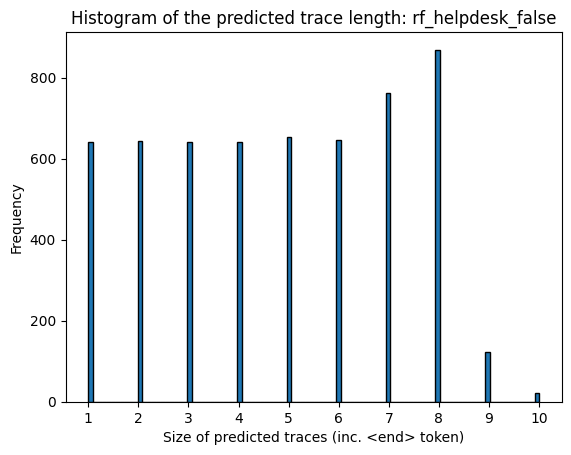

In [31]:
variables['predicted_trace_length_rf'], avg_pred_trace_length = prediction_statistics(y_pred_rf, path_reports, variables['random_forest_model'], timestamp, bins = 100)

### DLS

In [32]:
# Calculate similarity over the full sequence length
variables['similarity_rf_100'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_rf, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_rf'], variables["MAX_TOKENS"])

Comparing Sequences:  36%|███▌      | 2011/5643 [00:00<00:00, 10067.39it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.75
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.7142857142857143
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7 14 14 14 17  3]
Similarity:  0.6666666666666666
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [14 14 14 17  3]
Similarity:  0.6
y_test:      [15. 15. 17.  3.]
y_pred:      [14 14 17  3]
Similarity:  0.5
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.6
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.5555555555555556
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 15 17  3]
Similarity:  0.625
y_test: 

Comparing Sequences:  71%|███████   | 4020/5643 [00:00<00:00, 9950.82it/s] 

[ 5  6  7 14 14 14 17  3]
Similarity:  0.6
y_test:      [ 9.  6.  7. 14. 27. 27. 27. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.5555555555555556
y_test:      [ 6.  7. 14. 27. 27. 27. 17.  3.]
y_pred:      [ 6  7 14 15 15 15 17  3]
Similarity:  0.625
y_test:      [ 7. 14. 27. 27. 27. 17.  3.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.5714285714285714
y_test:      [14. 27. 27. 27. 17.  3.]
y_pred:      [14 15 15 15 17  3]
Similarity:  0.5
y_test:      [27. 27. 27. 17.  3.]
y_pred:      [15 15 15 17  3]
Similarity:  0.4
y_test:      [27. 27. 17.  3.]
y_pred:      [27 27 17  3]
Similarity:  1.0
y_test:      [27. 17.  3.]
y_pred:      [27 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 14. 14. 17.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  1.0
y_test:      [ 6.  7. 14. 14. 14. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  

Comparing Sequences: 100%|██████████| 5643/5643 [00:00<00:00, 9893.86it/s]

[17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 25. 14. 14. 14. 16.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.7
y_test:      [ 9.  6.  7. 25. 14. 14. 14. 16.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.6666666666666666
y_test:      [ 6.  7. 25. 14. 14. 14. 16.  3.]
y_pred:      [ 6  7 14 15 15 15 17  3]
Similarity:  0.375
y_test:      [ 7. 25. 14. 14. 14. 16.  3.]
y_pred:      [ 7 14 15 15 15 17  3]
Similarity:  0.2857142857142857
y_test:      [25. 14. 14. 14. 16.  3.]
y_pred:      [14 15 15 15 17  3]
Similarity:  0.16666666666666666
y_test:      [14. 14. 14. 16.  3.]
y_pred:      [15 15 15 16  3]
Similarity:  0.4
y_test:      [14. 14. 16.  3.]
y_pred:      [14 14 16  3]
Similarity:  1.0
y_test:      [14. 16.  3.]
y_pred:      [14 16  3]
Similarity:  1.0
y_test:      [16.  3.]
y_pred:      [16  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 15. 

In [33]:
# Calculate similarity over 25% sequence length
variables['similarity_rf_25'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_rf, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_rf'], variables["prediction_length_25"])

Comparing Sequences:   0%|          | 0/1981 [00:00<?, ?it/s]

y_test:      [15. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [18. 17.  3.  0.]
y_pred:      [18 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [18. 16.]
y_pred:      [18 17]
Similarity:  0.5
y_test:      [16.]
y_pred:      [17]
Similarity:  0.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [14. 17.  3.  0.]
y_pred:      [14 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [19. 16.  3.  0.]
y_pred:      [19 16  3  0]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [16  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.

Comparing Sequences: 100%|██████████| 1981/1981 [00:00<00:00, 10662.22it/s]

[17.]
y_pred:      [17]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [27. 17.  3.  0.]
y_pred:      [27 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [5. 9. 9. 6.]
y_pred:      [ 5  6  7 14]
Similarity:  0.25
y_test:      [18. 16.  3.]
y_pred:      [14 16  3]
Similarity:  0.6666666666666666
y_test:      [16.  3.]
y_pred:      [16  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [15. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [24. 17.  3.  0.]
y_pred:      [21 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3

In [34]:
# Calculate similarity over 50% sequence length
variables['similarity_rf_50'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_rf, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_rf'], variables["prediction_length_50"])

Comparing Sequences:   0%|          | 0/3907 [00:00<?, ?it/s]

y_test:      [ 7. 14. 15. 15. 17.  3.  0.]
y_pred:      [ 7 14 14 14 17  3  0]
Similarity:  0.7142857142857143
y_test:      [14. 15. 15. 17.  3.  0.  0.]
y_pred:      [14 14 14 17  3  0  0]
Similarity:  0.7142857142857143
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [14 14 17  3  0  0]
Similarity:  0.6666666666666666
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [14. 18.]
y_pred:      [14 15]
Similarity:  0.5
y_test:      [18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [18. 18. 17.  3.  0.  0.  0.]
y_pred:      [18 18 17  3  0  0  0]
Similarity:  1.0
y_test:      [18. 17.  3.  0.  0.  0.  0.]
y_pred:      [18 17  3  0  0  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 

Comparing Sequences:  52%|█████▏    | 2024/3907 [00:00<00:00, 10127.25it/s]

[14 14 14]
Similarity:  0.0
y_test:      [18. 18.]
y_pred:      [18 18]
Similarity:  1.0
y_test:      [18.]
y_pred:      [18]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  6.  5.  6.  7. 27.]
y_pred:      [ 5  6  7 14 14 14]
Similarity:  0.3333333333333333
y_test:      [27. 27. 21. 27. 17.]
y_pred:      [15 15 15 15 17]
Similarity:  0.2
y_test:      [27. 21. 27. 17.]
y_pred:      [27 15 15 17]
Similarity:  0.5
y_test:      [21. 27. 17.]
y_pred:      [15 15 17]
Similarity:  0.3333333333333333
y_test:      [27. 17.]
y_pred:      [21 17]
Similarity:  0.5
y_test:      [17.]
y_pred:      [17]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 7. 14. 14. 19. 17.  3.  0.]
y_pred:      [ 7 14 14 14 17  3  0]
Similarity:  0.8571428571428571
y_test:      [14. 14. 19. 1

Comparing Sequences:  78%|███████▊  | 3037/3907 [00:00<00:00, 10004.10it/s]

[18. 18. 18. 16.  3.  0.]
y_pred:      [18 18 27 17  3  0]
Similarity:  0.6666666666666666
y_test:      [18. 18. 16.  3.  0.]
y_pred:      [18 27 17  3  0]
Similarity:  0.6
y_test:      [18. 16.  3.  0.]
y_pred:      [27 17  3  0]
Similarity:  0.5
y_test:      [16.  3.  0.]
y_pred:      [16  3  0]
Similarity:  1.0
y_test:      [3. 0.]
y_pred:      [3 0]
Similarity:  1.0
y_test:      [14.]
y_pred:      [14]
Similarity:  1.0
y_test:      [22. 23. 23. 16.  3.  0.  0.]
y_pred:      [15 15 15 17  3  0  0]
Similarity:  0.42857142857142855
y_test:      [23. 23. 16.  3.  0.  0.  0.]
y_pred:      [22 22 16  3  0  0  0]
Similarity:  0.7142857142857143
y_test:      [23. 16.  3.  0.  0.  0.]
y_pred:      [22 17  3  0  0  0]
Similarity:  0.6666666666666666
y_test:      [16.  3.  0.  0.  0.]
y_pred:      [17  3  0  0  0]
Similarity:  0.8
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [ 7. 21. 21.]
y_pred:      [ 7 14 14]
Similarity:  0.3333333333333333
y_test:      [

Comparing Sequences: 100%|██████████| 3907/3907 [00:00<00:00, 10039.01it/s]

y_test:      [19. 16.  3.  0.  0.]
y_pred:      [19 16  3  0  0]
Similarity:  1.0
y_test:      [16.  3.  0.  0.]
y_pred:      [16  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [14. 15.]
y_pred:      [14 15]
Similarity:  1.0
y_test:      [15.]
y_pred:      [15]
Similarity:  1.0
y_test:      [15. 15. 17.  3.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0]
Similarity:  1.0
y_test:      [ 9.  9. 14. 15.]
y_pred:      [4 5 6 7]
Similarity:  0.0
y_test:      [ 9. 14. 15.]
y_pred:      [ 9 14 15]
Similarity:  1.0
y_test:      [14. 15.]
y_pred:      [14 15]
Similarity:  1.0
y_test:      [15.]
y_pred:      [15]
Similarity:  1.0
y_test:      [15.  3.  0.  0.  0.  0.  0.]
y_pred:      [15

In [35]:
# Calculate similarity over 75% sequence length
variables['similarity_rf_75'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_rf, variables['trace_length_reference_benchmark'], variables['predicted_trace_length_rf'], variables["prediction_length_75"])

Comparing Sequences:   0%|          | 0/5587 [00:00<?, ?it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.75
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.7142857142857143
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7 14 14 14 17  3]
Similarity:  0.6666666666666666
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [14 14 14 17  3]
Similarity:  0.6
y_test:      [15. 15. 17.  3.]
y_pred:      [14 14 17  3]
Similarity:  0.5
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.6
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 14 14 17  3]
Similarity:  0.5555555555555556
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 15 17  3]
Similarity:  0.625
y_test: 

Comparing Sequences:  18%|█▊        | 998/5587 [00:00<00:00, 9971.52it/s]

 [ 6  7 14 14]
Similarity:  0.5
y_test:      [ 7. 21. 21.]
y_pred:      [ 7 14 14]
Similarity:  0.3333333333333333
y_test:      [21. 21.]
y_pred:      [14 14]
Similarity:  0.0
y_test:      [21.]
y_pred:      [21]
Similarity:  1.0
y_test:      [21. 17.  3.  0.  0.  0.  0.  0.]
y_pred:      [21 17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14.]
y_pred:      [ 5  6  7 14 14]
Similarity:  0.6
y_test:      [ 9.  6.  7. 14.]
y_pred:      [ 6  7 14 14]
Similarity:  0.5
y_test:      [ 6.  7. 14.]
y_pred:      [ 6  7 14]
Similarity:  1.0
y_test:      [ 7. 14.]
y_pred:      [ 7 14]
Similarity:  1.0
y_test:      [14.]
y_pred:      [14]
Similarity:  1.0
y_test:      [15. 15. 15. 16.  3.  0.  0.  0.  0.  0.]
y_pred:      [15 15 15 17  3  0  0  0]
Similarity:  0.7
y_test:      [15. 15. 16.  3.  0.  0.  0.  

Comparing Sequences:  36%|███▌      | 1996/5587 [00:00<00:00, 9880.48it/s]

[17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  5.  6.  7. 18. 18. 18.]
y_pred:      [ 5  6  7 14 14 14 17  3]
Similarity:  0.125
y_test:      [ 5.  6.  7. 18. 18. 18. 18.]
y_pred:      [ 6  7 14 15 15 15 17]
Similarity:  0.14285714285714285
y_test:      [ 6.  7. 18. 18. 18. 18.]
y_pred:      [ 6  7 21 21 18 18]
Similarity:  0.6666666666666666
y_test:      [ 7. 18. 18. 18. 18.]
y_pred:      [ 7 21 21 18 18]
Similarity:  0.6
y_test:      [18. 18. 18. 18.]
y_pred:      [21 21 18 18]
Similarity:  0.5
y_test:      [18. 18. 18.]
y_pred:      [18 18 18]
Similarity:  1.0
y_test:      [18. 18.]
y_pred:      [18 18]
Similarity:  1.0
y_test:      [18.]
y_pred:      [18]
Similarity:  1.0
y_test:      []
y_pred:      [18 17  3  0  0  0  0  0]
Similarity:  0.0
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  0.6363636363636364
y_test:      [3. 0. 0. 0. 0. 0. 0. 0. 0.

Comparing Sequences:  53%|█████▎    | 2985/5587 [00:00<00:00, 9715.34it/s]

[15 17  3  0  0  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  6.  7. 15.]
y_pred:      [ 5  6  7 14]
Similarity:  0.75
y_test:      [ 6.  7. 15.]
y_pred:      [ 6  7 14]
Similarity:  0.6666666666666666
y_test:      [ 7. 15.]
y_pred:      [ 7 14]
Similarity:  0.5
y_test:      [15.]
y_pred:      [14]
Similarity:  0.0
y_test:      [15. 15. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 15 17  3  0  0  0  0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0  0]
Similarity:  0.7777777777777778
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0]
Similarity:  1.0
y_test:      [4. 5. 9. 6.]
y_pred:      [ 5  6  7 14]
Similarity:  0.0
y_test:      [9. 6. 7.]
y_pred:      [ 6  7 21]
Similarity:  0.3333333333

Comparing Sequences:  71%|███████   | 3966/5587 [00:00<00:00, 9750.26it/s]

Similarity:  0.2
y_test:      [18. 18. 18. 18.]
y_pred:      [14 15 19 19]
Similarity:  0.0
y_test:      [18. 18. 18.]
y_pred:      [18 18 18]
Similarity:  1.0
y_test:      [18. 18.]
y_pred:      [18 18]
Similarity:  1.0
y_test:      [18.]
y_pred:      [18]
Similarity:  1.0
y_test:      [18. 16.  3.  0.  0.  0.  0.  0.  0.  0.]
y_pred:      [27 17  3  0  0  0  0  0]
Similarity:  0.6
y_test:      [16.  3.  0.  0.  0.  0.  0.  0.  0.]
y_pred:      [16  3  0  0  0  0  0]
Similarity:  0.7777777777777778
y_test:      [3. 0. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0]
Similarity:  0.75
y_test:      [ 5.  9.  6.  7. 14. 22. 23.]
y_pred:      [ 5  6  7 14 14 14 17]
Similarity:  0.42857142857142855
y_test:      [ 9.  6.  7. 14. 22. 23.]
y_pred:      [ 6  7 14 14 14 17]
Similarity:  0.3333333333333333
y_test:      [ 6.  7. 14. 22. 23.]
y_pred:      [ 6  7 14 15 15]
Similarity:  0.6
y_test:      [ 7. 14. 22. 23.]
y_pred:      [ 7 14 15 15]
Similarity:  0.5
y_test:      [14. 22. 23.]
y_pred:    

Comparing Sequences:  88%|████████▊ | 4942/5587 [00:00<00:00, 9722.48it/s]

[21]
Similarity:  1.0
y_test:      [21. 23. 17.  3.  0.  0.  0.  0.]
y_pred:      [21 32 17  3  0  0  0  0]
Similarity:  0.875
y_test:      [23. 17.  3.  0.  0.  0.  0.]
y_pred:      [32 17  3  0  0  0  0]
Similarity:  0.8571428571428571
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0]
Similarity:  1.0
y_test:      [5. 9. 6. 7.]
y_pred:      [ 5  6  7 14]
Similarity:  0.5
y_test:      [9. 6. 7.]
y_pred:      [ 6  7 14]
Similarity:  0.3333333333333333
y_test:      [6. 7.]
y_pred:      [6 7]
Similarity:  1.0
y_test:      [7.]
y_pred:      [7]
Similarity:  1.0
y_test:      [14. 15. 15. 15. 16.  3.  0.  0.]
y_pred:      [14 15 15 15 17  3  0  0]
Similarity:  0.875
y_test:      [15. 15. 15. 16.  3.  0.  0.]
y_pred:      [15 15 15 17  3  0  0]
Similarity:  0.8571428571428571
y_test:      [15. 15. 16.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0]
Similarity:  0.8333333333333334
y_test:      [15. 16.

Comparing Sequences: 100%|██████████| 5587/5587 [00:00<00:00, 9757.18it/s]

y_test:      [ 5.  6.  7. 18. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 5  6  7 14 14 14]
Similarity:  0.3
y_test:      [ 6.  7. 18. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 6  7 14 14 14 17  3  0  0]
Similarity:  0.6666666666666666
y_test:      [ 7. 18. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7 14 14 14 17  3  0  0]
Similarity:  0.625
y_test:      [18. 15. 15. 17.  3.  0.  0.]
y_pred:      [14 14 14 17  3  0  0]
Similarity:  0.5714285714285714
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [18 18 17  3  0  0]
Similarity:  0.6666666666666666
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [5. 6.]
y_pred:      [5 6]
Similarity:  1.0
y_test:      [6.]
y_pred:      [6]
Similarity:  1.0
y_test:      [ 7. 21. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7 14 14 14 17  3  0  0]
Similarity:  0.625
y_test:      [21.

### Sequence Accuracy

In [36]:
# Calculate sequence accuracy for the complete sequence length
variables['seq_acc_rf_100'] = evaluate_seq_accuracy(y_pred_rf, y_test_benchmark)

Correct sequences:  2153
Total sequences:    5643
Sequence accuracy:  0.3815


In [37]:
# Calculate sequence accuracy for 25% of the sequence length
variables['seq_acc_rf_25'] = evaluate_seq_accuracy(y_pred_rf[:,:variables['prediction_length_25']], y_test_benchmark[:,:variables['prediction_length_25']])

Correct sequences:  2308
Total sequences:    5643
Sequence accuracy:  0.409


In [38]:
# Calculate sequence accuracy for 50% of the sequence length
variables['seq_acc_rf_50'] = evaluate_seq_accuracy(y_pred_rf[:,:variables['prediction_length_50']], y_test_benchmark[:,:variables['prediction_length_50']])

Correct sequences:  2153
Total sequences:    5643
Sequence accuracy:  0.3815


In [39]:
# Calculate sequence accuracy for 75% of the sequence length
variables['seq_acc_rf_75'] = evaluate_seq_accuracy(y_pred_rf[:,:variables['prediction_length_75']], y_test_benchmark[:,:variables['prediction_length_75']])

Correct sequences:  2153
Total sequences:    5643
Sequence accuracy:  0.3815


## Logistical Regression

Average prediction length for (logreg_helpdesk_false.joblib): 4.7466
Please be aware that the average prediction length contains the end token.



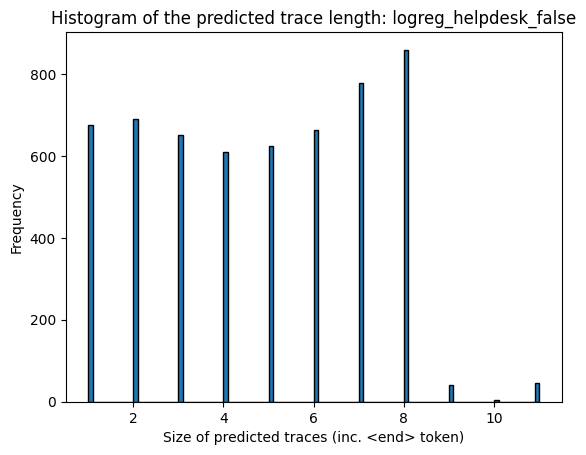

In [40]:
# Prediction statistics
variables['predicted_trace_length_lg'], avg_pred_trace_length = prediction_statistics(y_pred_lg, path_reports, variables['regression_model'], timestamp, bins = 100)

### DLS

In [41]:
# Calculate similarity for complete sequence length
variables['similarity_lg_100'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lg, variables['trace_length_reference_benchmark'], variables['trace_length_reference_benchmark'], variables["MAX_TOKENS"])

Comparing Sequences:  35%|███▌      | 2003/5643 [00:00<00:00, 10021.43it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 17  3]
Similarity:  1.0
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [14 15 15 17  3]
Similarity:  1.0
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3  0  0]
Similarity:  0.4
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3  0  0]
Similarity:  0.3333333333333333
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 15 16  3]
Similarity:  0.5
y_test:      [ 7. 14. 18. 18.

Comparing Sequences:  71%|███████   | 4009/5643 [00:00<00:00, 9932.79it/s] 

[ 7. 14. 15. 15. 14. 16.  3.]
y_pred:      [ 7  7 14 15 15 15 15]
Similarity:  0.42857142857142855
y_test:      [14. 15. 15. 14. 16.  3.]
y_pred:      [ 7 14 15 15 15 15]
Similarity:  0.3333333333333333
y_test:      [15. 15. 14. 16.  3.]
y_pred:      [15 15 15 17  3]
Similarity:  0.6
y_test:      [15. 14. 16.  3.]
y_pred:      [15 15 17  3]
Similarity:  0.5
y_test:      [14. 16.  3.]
y_pred:      [15 17  3]
Similarity:  0.3333333333333333
y_test:      [16.  3.]
y_pred:      [17  3]
Similarity:  0.5
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 21. 21. 21. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3]
Similarity:  0.625
y_test:      [ 6.  7. 21. 21. 21. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3]
Similarity:  0.5714285714285714
y_test:      [ 7. 21. 21. 21. 17.  3.]
y_pred:      [ 7 14 15 15 17  3]
Similarity:  0.5
y_test:      [21. 21. 21. 17.  3.]
y_pred:      [14 15 15 17  3]
Similarity:  0.4
y_test:      [21. 21. 17.  3.]
y_pred:      [15 15 17  3]

Comparing Sequences: 100%|██████████| 5643/5643 [00:00<00:00, 9902.13it/s]

y_pred:      [14 15 15 15 17  3]
Similarity:  0.16666666666666666
y_test:      [19. 19. 14. 16.  3.]
y_pred:      [15 15 15 16  3]
Similarity:  0.4
y_test:      [19. 14. 16.  3.]
y_pred:      [15 15 17  3]
Similarity:  0.25
y_test:      [14. 16.  3.]
y_pred:      [15 17  3]
Similarity:  0.3333333333333333
y_test:      [16.  3.]
y_pred:      [17  3]
Similarity:  0.5
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 17  3]
Similarity:  1.0
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [14 15 15 17  3]
Similarity:  1.0
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test

In [42]:
# Calculate similarity over 25% sequence length
variables['similarity_lg_25'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lg, variables['trace_length_reference_benchmark'], variables['trace_length_reference_benchmark'], variables["prediction_length_25"])

Comparing Sequences:   0%|          | 0/1981 [00:00<?, ?it/s]

y_test:      [15. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [18. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [18. 16.]
y_pred:      [15 17]
Similarity:  0.0
y_test:      [16.]
y_pred:      [17]
Similarity:  0.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [14. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [19. 16.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.5
y_test:      [16.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  0.75
y_test:      [3. 0.

Comparing Sequences: 100%|██████████| 1981/1981 [00:00<00:00, 10780.01it/s]

[14.]
y_pred:      [3]
Similarity:  0.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [18. 17.  3.  0.]
y_pred:      [17  3  0  0]
Similarity:  0.5
y_test:      [17.  3.  0.  0.]
y_pred:      [3 0 0 0]
Similarity:  0.5
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [27. 17.  3.  0.]
y_pred:      [27 17  3  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0.]
y_pred:      [3 0 0 0]
Similarity:  1.0
y_test:      [5. 9. 5. 6.]
y_pred:      [ 5  6  7 14]
Similarity:  0.25
y_test:      [19. 17.  3.  0.]
y_pred:      [15 17  3  0]
Similarity:  0.75
y_test:      [17.  3.  0.]
y_pred:      [17  3  0]
Similari

In [43]:
# Calculate similarity over 50% sequence length
variables['similarity_lg_50'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lg, variables['trace_length_reference_benchmark'], variables['trace_length_reference_benchmark'], variables["prediction_length_50"])

Comparing Sequences:   0%|          | 0/3907 [00:00<?, ?it/s]

y_test:      [ 7. 14. 15. 15. 17.  3.  0.]
y_pred:      [ 7 14 15 15 17  3  0]
Similarity:  1.0
y_test:      [14. 15. 15. 17.  3.  0.  0.]
y_pred:      [14 15 15 17  3  0  0]
Similarity:  1.0
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [14. 18.]
y_pred:      [14 15]
Similarity:  0.5
y_test:      [18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [18. 18. 17.  3.  0.  0.  0.]
y_pred:      [15 15 16  3  0  0  0]
Similarity:  0.5714285714285714
y_test:      [18. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0]
Similarity:  0.8571428571428571
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Si

Comparing Sequences:  52%|█████▏    | 2028/3907 [00:00<00:00, 10149.36it/s]

Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0]
Similarity:  1.0
y_test:      [5. 6. 5. 6. 7.]
y_pred:      [ 5  6  7 14 15]
Similarity:  0.4
y_test:      [14. 14. 14. 27.]
y_pred:      [15 15 15 15]
Similarity:  0.0
y_test:      [14. 14. 27.]
y_pred:      [15 15 15]
Similarity:  0.0
y_test:      [14. 27.]
y_pred:      [15 15]
Similarity:  0.0
y_test:      [27.]
y_pred:      [15]
Similarity:  0.0
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [15. 15. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 15 15]
Similarity:  0.3333333333333333
y_test:      [15. 15. 15. 17.  3.]
y_pred:      [15 15 15 17  3]
Similarity:  1.0
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_t

Comparing Sequences: 100%|██████████| 3907/3907 [00:00<00:00, 10069.09it/s]

y_test:      [15. 17.  3.  0.  0.  0.  0.]
y_pred:      [15 16  3  0  0  0  0]
Similarity:  0.8571428571428571
y_test:      [17.  3.  0.  0.  0.  0.]
y_pred:      [16  3  0  0  0  0]
Similarity:  0.8333333333333334
y_test:      [3. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0]
Similarity:  1.0
y_test:      [ 9.  9. 14. 15.]
y_pred:      [ 4  6  7 14]
Similarity:  0.0
y_test:      [ 9. 14. 15.]
y_pred:      [ 6  7 17]
Similarity:  0.0
y_test:      [14. 15.]
y_pred:      [ 7 17]
Similarity:  0.0
y_test:      [15.]
y_pred:      [17]
Similarity:  0.0
y_test:      [15.  3.  0.  0.  0.  0.  0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  0.7142857142857143
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 7. 19. 19. 19. 17.  3.  0.]
y_pred:      [ 7 14 15 15 17  3  0]
Similarity:  0.5714285714285714
y_test:      [19. 19. 19. 17.  3.  0.  0.]
y_pred:      [14 15 15 17  3  0  0]
Similarity:  0.5714285714285714
y_test:      [19. 19. 17.  3.  0.  0.]
y_pred: 

In [44]:
# Calculate similarity over 75% sequence length
variables['similarity_lg_75'] = damerau_levenshtein_similarity(y_test_benchmark, y_pred_lg, variables['trace_length_reference_benchmark'], variables['trace_length_reference_benchmark'], variables["prediction_length_75"])

Comparing Sequences:   0%|          | 0/5587 [00:00<?, ?it/s]

y_test:      [ 5.  6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 6.  7. 14. 15. 15. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3]
Similarity:  1.0
y_test:      [ 7. 14. 15. 15. 17.  3.]
y_pred:      [ 7 14 15 15 17  3]
Similarity:  1.0
y_test:      [14. 15. 15. 17.  3.]
y_pred:      [14 15 15 17  3]
Similarity:  1.0
y_test:      [15. 15. 17.  3.]
y_pred:      [15 15 17  3]
Similarity:  1.0
y_test:      [15. 17.  3.]
y_pred:      [15 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 5  6  7 14 15 15 17  3  0  0]
Similarity:  0.4
y_test:      [ 9.  6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 17  3  0  0]
Similarity:  0.3333333333333333
y_test:      [ 6.  7. 14. 18. 18. 18. 17.  3.]
y_pred:      [ 6  7 14 15 15 15 16  3]
Similarity:  0.5
y_test:      [ 7. 14. 18. 18.

Comparing Sequences:  18%|█▊        | 986/5587 [00:00<00:00, 9858.48it/s]

[ 5  6  7 14 15]
Similarity:  0.6
y_test:      [ 6.  7. 21. 21.]
y_pred:      [ 6  7 14 15]
Similarity:  0.5
y_test:      [ 7. 21. 21.]
y_pred:      [ 7 14 15]
Similarity:  0.3333333333333333
y_test:      [21. 21.]
y_pred:      [14 15]
Similarity:  0.0
y_test:      [21.]
y_pred:      [15]
Similarity:  0.0
y_test:      [21. 17.  3.  0.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0]
Similarity:  0.875
y_test:      [17.  3.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14.]
y_pred:      [ 5  6  7 14 15]
Similarity:  0.6
y_test:      [ 9.  6.  7. 14.]
y_pred:      [ 6  7 14 15]
Similarity:  0.5
y_test:      [ 6.  7. 14.]
y_pred:      [ 6  7 14]
Similarity:  1.0
y_test:      [ 7. 14.]
y_pred:      [ 7 14]
Similarity:  1.0
y_test:      [14.]
y_pred:      [14]
Similarity:  1.0
y_test:      [15. 15. 15. 16.  3.  0.  0.  0.  0.  0.]
y_pred:      [15 15 

Comparing Sequences:  35%|███▌      | 1972/5587 [00:00<00:00, 9821.43it/s]

[ 7 14 15 15 17  3  0  0]
Similarity:  0.125
y_test:      [ 7. 32. 32. 32. 32. 17.  3.]
y_pred:      [14 15 15 17  3  0  0]
Similarity:  0.0
y_test:      [32. 32. 32. 32. 17.  3.]
y_pred:      [ 7 14 15 15 15 33]
Similarity:  0.0
y_test:      [32. 32. 32. 17.  3.]
y_pred:      [27 17  3  0  0]
Similarity:  0.0
y_test:      [32. 32. 17.  3.]
y_pred:      [17  3  0  0]
Similarity:  0.0
y_test:      [32. 17.  3.]
y_pred:      [32 17  3]
Similarity:  1.0
y_test:      [17.  3.]
y_pred:      [17  3]
Similarity:  1.0
y_test:      [3.]
y_pred:      [3]
Similarity:  1.0
y_test:      [ 5.  6.  7. 14. 27. 27. 16.  3.  0.  0.]
y_pred:      [ 5  6  7 14 15 15 17  3  0  0]
Similarity:  0.7
y_test:      [ 6.  7. 14. 27. 27. 16.  3.  0.  0.]
y_pred:      [ 6  7 14 15 15 17  3  0  0]
Similarity:  0.6666666666666666
y_test:      [ 7. 14. 27. 27. 16.  3.  0.  0.]
y_pred:      [ 7 14 15 15 17  3  0  0]
Similarity:  0.625
y_test:      [14. 27. 27. 16.  3.  0.  0.]
y_pred:      [14 15 15 17  3  0  0]
Simila

Comparing Sequences:  53%|█████▎    | 2955/5587 [00:00<00:00, 9767.97it/s]

[18. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0  0]
Similarity:  0.8888888888888888
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  9.  5.  9. 14. 15.]
y_pred:      [ 5  6  7 14 15 15]
Similarity:  0.3333333333333333
y_test:      [ 9.  5.  9. 14. 15.]
y_pred:      [ 6  7 14 15 15]
Similarity:  0.2
y_test:      [ 5.  9. 14. 15.]
y_pred:      [ 6  7 14 15]
Similarity:  0.5
y_test:      [ 9. 14. 15.]
y_pred:      [ 7 14 15]
Similarity:  0.6666666666666666
y_test:      [14. 15.]
y_pred:      [14 15]
Similarity:  1.0
y_test:      [15.]
y_pred:      [15]
Similarity:  1.0
y_test:      [15. 15. 15.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 15 16  3  0  0  0  0  0  0]
Similarity:  0.9
y_test:      [15. 15.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 16  3  0  0  0  0  0  0]
Similarity:  0.8888888888888888
y_

Comparing Sequences:  70%|███████   | 3932/5587 [00:00<00:00, 9751.58it/s]

[ 7 14 15 15 17  3  0  0]
Similarity:  0.875
y_test:      [15. 15. 15. 17.  3.  0.  0.]
y_pred:      [14 15 15 17  3  0  0]
Similarity:  0.8571428571428571
y_test:      [15. 15. 17.  3.  0.  0.]
y_pred:      [15 15 17  3  0  0]
Similarity:  1.0
y_test:      [15. 17.  3.  0.  0.]
y_pred:      [15 17  3  0  0]
Similarity:  1.0
y_test:      [17.  3.  0.  0.]
y_pred:      [17  3  0  0]
Similarity:  1.0
y_test:      [3. 0. 0.]
y_pred:      [3 0 0]
Similarity:  1.0
y_test:      [5. 9.]
y_pred:      [5 6]
Similarity:  0.5
y_test:      [9.]
y_pred:      [6]
Similarity:  0.0
y_test:      [ 6.  7. 14. 15. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 6  7 14 15 15 15 16  3  0  0]
Similarity:  0.9
y_test:      [ 7. 14. 15. 15. 15. 17.  3.  0.  0.]
y_pred:      [ 7 14 15 15 15 16  3  0  0]
Similarity:  0.8888888888888888
y_test:      [14. 15. 15. 15. 17.  3.  0.  0.]
y_pred:      [14 15 15 15 16  3  0  0]
Similarity:  0.875
y_test:      [15. 15. 15. 17.  3.  0.  0.]
y_pred:      [15 15 15 16  3  0  0]
S

Comparing Sequences:  88%|████████▊ | 4908/5587 [00:00<00:00, 9714.59it/s]

[3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  9.  6.  7. 14. 18.]
y_pred:      [ 5  6  7 14 15 15]
Similarity:  0.5
y_test:      [ 9.  6.  7. 14. 18.]
y_pred:      [ 6  7 14 15 15]
Similarity:  0.4
y_test:      [ 6.  7. 14. 18.]
y_pred:      [ 6  7 14 15]
Similarity:  0.75
y_test:      [ 7. 14. 18.]
y_pred:      [ 7 14 15]
Similarity:  0.6666666666666666
y_test:      [14. 18.]
y_pred:      [14 15]
Similarity:  0.5
y_test:      [18.]
y_pred:      [15]
Similarity:  0.0
y_test:      [18. 18. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 15 16  3  0  0  0  0  0  0]
Similarity:  0.7
y_test:      [18. 17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [15 17  3  0  0  0  0  0  0]
Similarity:  0.8888888888888888
y_test:      [17.  3.  0.  0.  0.  0.  0.  0.]
y_pred:      [17  3  0  0  0  0  0  0]
Similarity:  1.0
y_test:      [3. 0. 0. 0. 0. 0. 0.]
y_pred:      [3 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 5.  6.  7. 32. 32. 32.]
y_pred:      [ 5  6 

Comparing Sequences: 100%|██████████| 5587/5587 [00:00<00:00, 9749.57it/s]

[3 0 0 0 0 0 0 0 0]
Similarity:  1.0
y_test:      [ 6.  7. 27. 27. 17.  3.  0.  0.]
y_pred:      [ 5  6  7 14 15 15 17  3]
Similarity:  0.25
y_test:      [ 7. 27. 27. 17.  3.  0.  0.]
y_pred:      [ 6  7 14 15 15 17  3]
Similarity:  0.14285714285714285
y_test:      [27. 27. 17.  3.  0.  0.]
y_pred:      [ 7 14 15 15 17  3]
Similarity:  0.0
y_test:      [27. 17.  3.  0.  0.]
y_pred:      [27 27 17 17  3]
Similarity:  0.2
y_test:      [17.  3.  0.  0.]
y_pred:      [27 17 17  3]
Similarity:  0.0
y_test:      [3. 0. 0.]
y_pred:      [17 17  3]
Similarity:  0.0
y_test:      [4. 5.]
y_pred:      [4 6]
Similarity:  0.5
y_test:      [5.]
y_pred:      [6]
Similarity:  0.0
y_test:      []
y_pred:      []
Similarity:  1.0
y_test:      [ 7. 17. 15. 23. 23. 17.  3.  0.  0.  0.  0.]
y_pred:      [14 15 15 17  3  0  0  0  0  0  0]
Similarity:  0.45454545454545453
y_test:      [17. 15. 23. 23. 17.  3.  0.  0.  0.  0.]
y_pred:      [ 7 14 15 15 15 33 17  3  0  0]
Similarity:  0.3
y_test:      [15. 23.

### Sequence Accuracy

In [45]:
# Calculate sequence accuracy for complete sequence length
variables['seq_acc_lg_100'] = evaluate_seq_accuracy(y_pred_lg, y_test_benchmark)

Correct sequences:  1492
Total sequences:    5643
Sequence accuracy:  0.2644


In [46]:
# Calculate sequence accuracy for 25% of the sequence length
variables['seq_acc_lg_25'] = evaluate_seq_accuracy(y_pred_lg[:,:variables['prediction_length_25']], y_test_benchmark[:,:variables['prediction_length_25']])

Correct sequences:  1631
Total sequences:    5643
Sequence accuracy:  0.289


In [47]:
# Calculate sequence accuracy for 50% of the sequence length
variables['seq_acc_lg_50'] = evaluate_seq_accuracy(y_pred_lg[:,:variables['prediction_length_50']], y_test_benchmark[:,:variables['prediction_length_50']])

Correct sequences:  1492
Total sequences:    5643
Sequence accuracy:  0.2644


In [48]:
# Calculate sequence accuracy for 75% of the sequence length
variables['seq_acc_lg_75'] = evaluate_seq_accuracy(y_pred_lg[:,:variables['prediction_length_75']], y_test_benchmark[:,:variables['prediction_length_75']])

Correct sequences:  1492
Total sequences:    5643
Sequence accuracy:  0.2644


### Generate Report 

In [49]:
# Generate evaluation report
report_evaluation(filename_variables, variables, timestamp, path_reports)


Summary:


Dataset:                 helpdesk.csv
Filename interim data:   interim_data_helpdesk_false.npz
Filename processed data: preprocessed_data_helpdesk_false.npz
Filename variables:      variables_helpdesk_false.pkl


vocab (first 6):         ['<pad>' '<unk>' '<start>' '<end>' 'Assign-seriousness'
 'Take-in-charge-ticket']
vocab_size:              36
max_length_trace:        6
num_traces:              4255
num_ex_activities:       18809
num_features:            2
features:                ['concept:name', 'org:resource']
interleave:              False


Dataset
Samples in training:     (26332, 14)
Samples in validation:   (5643, 14)
Samples in test:         (5643, 14)


Benchmark Dataset:
Samples in training:     (26332, 12)
Samples in validation:   (5643, 12)
Samples in test:         (5643, 12)


Dataset:


Prediction length:


Prediction length 25%:  4
Prediction length 50%:  7
Prediction length 75%:  11


Evaluation Reference data:
Average pred. trace len: 5.010987063618643


